In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

from tqdm import tqdm   # pip install tqdm
from libs import stock_daum, stock_naver

## 코스피 종목코드 수집

In [2]:
# 코스피 지수 CSV를 읽어들입니다.
kospi_df = pd.read_csv("https://bit.ly/3g5YKXT", index_col='종목명', dtype={'종목코드': str})
print(kospi_df.shape)
kospi_df.head()

(768, 1)


,종목코드
종목명,
미원에스씨,268280
경동도시가스,267290
넷마블게임즈,251270
아이엔지생명,079440
현대건설기계,267270


In [3]:
kospi_series = kospi_df['종목코드']
kospi_series.head()

종목명
미원에스씨     268280
경동도시가스    267290
넷마블게임즈    251270
아이엔지생명    079440
현대건설기계    267270
Name: 종목코드, dtype: object

## 종목별 실시간 시세 시각화

In [4]:
code = kospi_series['삼성전자']
삼성전자_volume_df = stock_naver.get_종목별_시간별_시세(code, max_page=20)

code = kospi_series['LG전자']
LG전자_volume_df = stock_naver.get_종목별_시간별_시세(code, max_page=20)

code = kospi_series['SK하이닉스']
SK하이닉스_volume_df = stock_naver.get_종목별_시간별_시세(code, max_page=20)

In [5]:
print(삼성전자_volume_df.shape)
삼성전자_volume_df.head()

(200, 6)


,체결가,전일비,매도,매수,거래량,변동량
체결시각,,,,,,
2021-04-28 15:58:00,82100,800,82200,82100,15255384,109
2021-04-28 15:57:00,82100,800,82200,82100,15255275,3
2021-04-28 15:56:00,82100,800,82200,82100,15255272,579
2021-04-28 15:55:00,82100,800,82200,82100,15254693,461
2021-04-28 15:54:00,82100,800,82200,82100,15254232,71


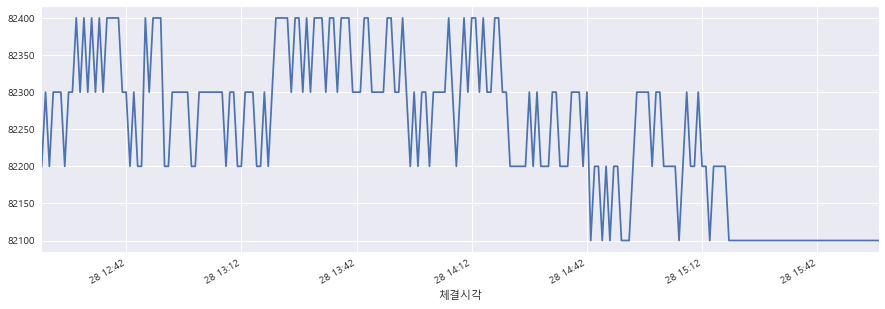

In [6]:
삼성전자_volume_df['체결가'].plot(figsize=(15, 5))

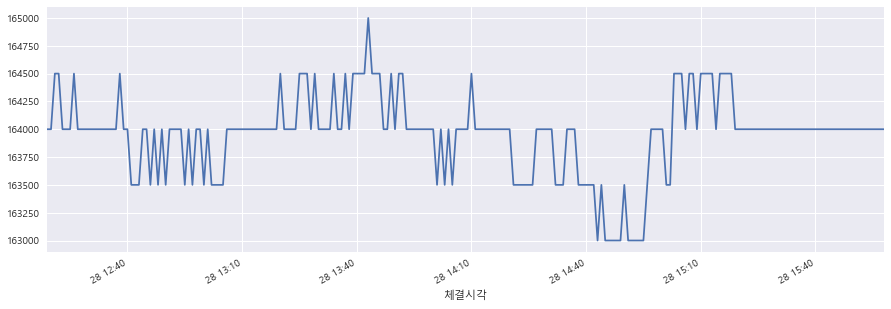

In [7]:
LG전자_volume_df['체결가'].plot(figsize=(15, 5))

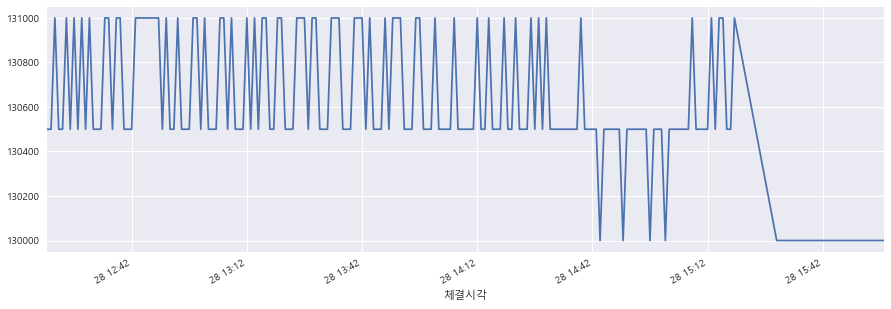

In [8]:
SK하이닉스_volume_df['체결가'].plot(figsize=(15, 5))

## 하나의 DataFrame으로 처리

In [9]:
df = pd.DataFrame({
    '삼성전자': 삼성전자_volume_df['체결가'],
    'LG전자': LG전자_volume_df['체결가'],
    'SK하이닉스': SK하이닉스_volume_df['체결가'],
})

start_ts = df.iloc[0].name
end_ts = df.iloc[-1].name

print(start_ts, '~', end_ts)

print(df.shape)
df.head()

2021-04-28 12:19:00 ~ 2021-04-28 15:58:00
(201, 3)


,LG전자,SK하이닉스,삼성전자
체결시각,,,
2021-04-28 12:19:00,164000.0,NaN,NaN
2021-04-28 12:20:00,164000.0,130500.0,82200.0
2021-04-28 12:21:00,164500.0,130500.0,82300.0
2021-04-28 12:22:00,164500.0,131000.0,82200.0
2021-04-28 12:23:00,164000.0,130500.0,82300.0


## 체결가 시각화

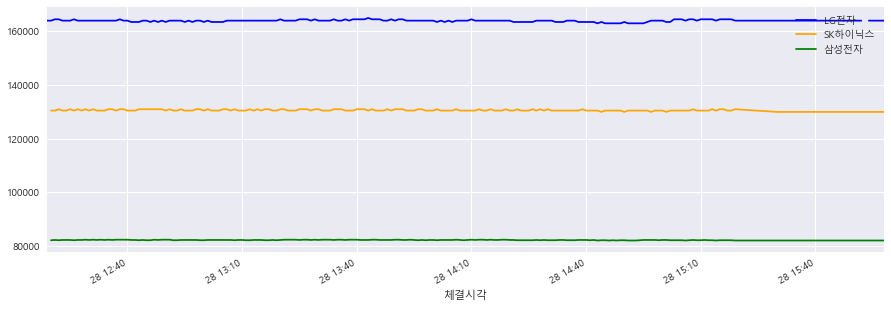

In [11]:
ax = df.plot(figsize=(15, 5), color=['blue', 'orange', 'green'])

In [12]:
df2 = pd.DataFrame({
#     '삼성전자': 삼성전자_volume_df['체결가'],
    'LG전자': LG전자_volume_df['체결가'],
    'SK하이닉스': SK하이닉스_volume_df['체결가'],
})
print(df2.shape)
df2.head()

(201, 2)


,LG전자,SK하이닉스
체결시각,,
2021-04-28 12:19:00,164000.0,NaN
2021-04-28 12:20:00,164000.0,130500.0
2021-04-28 12:21:00,164500.0,130500.0
2021-04-28 12:22:00,164500.0,131000.0
2021-04-28 12:23:00,164000.0,130500.0


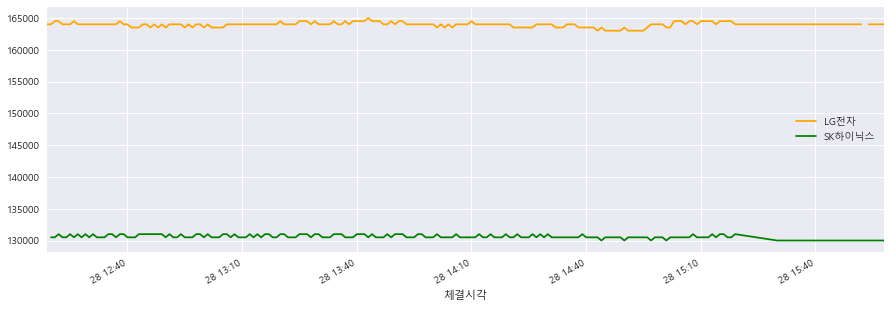

In [13]:
df2.plot(figsize=(15, 5), color=['orange', 'green'])